# Анализ рынка общественного питания в Москве

- Автор: Лапушкина Ирина
- Дата: 21.09.2025

### Цели и задачи проекта

Цель: провести исследовательский анализ рынка общественного питания в Москве.

Задачи:
1. Загрузить данные и познакомиться с ними.
2. Предобработать данных.
3. Провести исследовательский анализ данных
4. Сформулировать выводы по проведенному анализу.

### Описание данных

Данные состоят из двух датасетов:
- `rest_info.csv`- информация о заведениях общественного питания
- `rest_price.csv` - информация о среднем чеке в заведениях общественного питания

Описание датасета `rest_info.csv`:
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки)
- `seats` — количество посадочных мест.

Описание датасета - `rest_price.csv`:

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта
1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных
4. Выводы по проведенному анализу.

## 1. Загрузка данных и знакомство с ними

Загрузим данные о заведениях общественного питания Москвы и познакомимся с ними.

In [1]:
#Загружаем библиотеку для анализа данных
import pandas as pd

#Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

#Импортируем библиотеку для расчета коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

     |████████████████████████████████| 677 kB 2.4 MB/s eta 0:00:01


In [2]:
# Выгружаем данные в переменные
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_pr = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с датасетом `rest_info.csv`.

In [3]:
#Выведем информацию о датасете
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [4]:
#Выведем первые строки датасета
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк.
После первичного анализа можно сделать следующие выводы:
- Названия столбцов понятны и написаны в едином стиле;
- Значения в столбцах соответствуют названиям;
- Пропуски встречаются в столбцах `hours` и `seats`;
- Размерность столбца `chain` можно уменьшить;
- Тип данных у столбца `seats` необходимо поменять с float64 на int64.

Теперь познакомимся с данными датасета `rest_price.csv`.

In [5]:
#Выведем информацию о датасете
rest_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [6]:
#Выведем первые строки датасета
rest_pr.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


Датасет `rest_price.csv` содержит 5 столбцов и 4057 строк.

Можно отметить, что:
- Названия столбцов написаны в едином стиле и содержимое соответствует названиям;
- Во всех столбцах, кроме `id`, содержатся пропуски;
- Типы данных во всех столбцах указаны верно.

### Подготовка единого датафрейма

Объединим данные двух датасетов в один, с которым продолжим дальше работать.

In [7]:
#Объединяем данные в один датасет
rest = rest_info.merge(rest_pr, on='id', how='left')
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


## 2. Предобработка данных

Подготовим данные к исследовательскому анализу.

In [8]:
#Изменим размерность столбца `chain`
rest['chain']=pd.to_numeric(rest['chain'], downcast='integer')
rest.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   int8
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

In [9]:
#Посчитаем кол-во пропущенных значений
rest.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [10]:
#Посчитаем долю пропущенных значений
rest.isna().mean()

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

Пропущенные значения в столбце "seats" можно заменить на значение-индикатор "-1", чтобы преобразовать тип столбца в целочисленный.
Пропущенные значения в столбцах `hours`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup` мы не сможем восстановить, а удаление их приведет к потере большого кол-ва данных. Поэтому оставим, как есть.

Пропуски могли появиться так, как в открытых источниках не было информации.

In [11]:
#Подставим значение-индикатор и изменим тип данных в столбце `seats`
rest['seats'] = rest['seats'].fillna(-1).astype('int64')
rest['seats'].dtype

dtype('int64')

Проверим данные на явные и неявные дубликаты. Для начала выведем уникальные значения некоторых столбцов, где могут быть неявные дубли.

In [12]:
rest['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [13]:
display(rest['name'].unique(),rest['name'].nunique())

array(['WoWфли', 'Четыре комнаты', 'Хазри', ..., 'Миславнес', 'Самовар',
       'Kebab Time'], dtype=object)

5614

In [14]:
display(rest['address'].unique(), rest['address'].nunique())

array(['Москва, улица Дыбенко, 7/1', 'Москва, улица Дыбенко, 36, корп. 1',
       'Москва, Клязьминская улица, 15', ...,
       'Москва, улица Лобачевского, 52, корп. 1',
       'Москва, Болотниковская улица, 52, корп. 2',
       'Москва, Чонгарский бульвар, 26А, корп. 1'], dtype=object)

5753

В столбце `category` дублей нет. В столбцах `name` и `address` слишком много уникальных значений, чтобы их можно было выявить глазами. На всякий случай, приведем названия заведений в нижний регистр.

In [15]:
#Запишем названия заведений в нижнем регистре
rest['name'] = rest['name'].str.lower()

Проверим наличие явных дубликатов.

In [16]:
rest.duplicated().sum()

0

Явных дубликатов нет.

In [17]:
#Проверим наличие неявных дубликатов
rest[rest.duplicated(subset=['name','address'],keep=False)]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"Москва, проспект Мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150,NaN,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276,NaN,NaN,NaN,NaN


In [18]:
#Удалим найденные неявные дубликаты
rest=rest.drop_duplicates(subset=['name','address'])
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8403 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8403 non-null   object 
 1   name               8403 non-null   object 
 2   category           8403 non-null   object 
 3   address            8403 non-null   object 
 4   district           8403 non-null   object 
 5   hours              7868 non-null   object 
 6   rating             8403 non-null   float64
 7   chain              8403 non-null   int8   
 8   seats              8403 non-null   int64  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(3), int64(1), int8(1), object(8)
memory usage: 861.6+ KB


Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [19]:
rest['is_24_7'] = rest['hours'].str.strip().str.lower() == 'ежедневно, круглосуточно'
display(rest['is_24_7'])

0       False
1       False
2       False
3       False
4       False
        ...  
8401    False
8402    False
8403     True
8404     True
8405     True
Name: is_24_7, Length: 8403, dtype: bool

---

### Промежуточный вывод

На этапе предобработки данных мы:
- изменили размерность столбца `chain` с int64 на int8;
- заменили пропущенные значения в столбце `seats` на "-1" и изменили тип данных с float64 на int64;
- привели названия заведений к нижнему регистру;
- удалили 3 неявных дубликата;
- создали столбец `is_24_7`, где указано, работает ли заведение ежедневно и круглосуточно или нет.

## 3. Исследовательский анализ данных

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [20]:
#Считаем кол-во объектов в каждой категории
rest['category'].value_counts()

кафе               2377
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [21]:
#Посмотрим распределение в долях 
rest['category'].value_counts(normalize='True')

кафе               0.282875
ресторан           0.243008
кофейня            0.168154
бар,паб            0.090920
пиццерия           0.075330
быстрое питание    0.071760
столовая           0.037487
булочная           0.030465
Name: category, dtype: float64

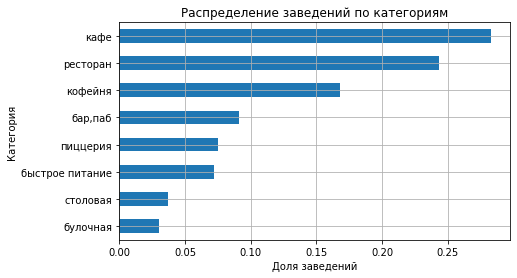

In [22]:
#Изобразим распределение на графике
rest['category'].value_counts(ascending=True, normalize=True).plot(
    kind='barh', 
    figsize=(7,4), 
    title='Распределение заведений по категориям')
plt.xlabel('Доля заведений')
plt.ylabel('Категория')
plt.grid()
plt.show()

Больше всего заведений в категориях "кафе" и "ресторан" - 28,3% и 24,3% соответственно.
Меньше всего заведений в категории "булочная" - 3%.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [23]:
#Посчитаем кол-во заведений в каждом районе
rest['district'].value_counts()

Центральный административный округ         2242
Северный административный округ             899
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

In [24]:
#Посчитаем долю заведений в каждом районе
rest['district'].value_counts(normalize=True)

Центральный административный округ         0.266809
Северный административный округ            0.106986
Южный административный округ               0.106153
Северо-Восточный административный округ    0.105915
Западный административный округ            0.101154
Восточный административный округ           0.094966
Юго-Восточный административный округ       0.084970
Юго-Западный административный округ        0.084375
Северо-Западный административный округ     0.048673
Name: district, dtype: float64

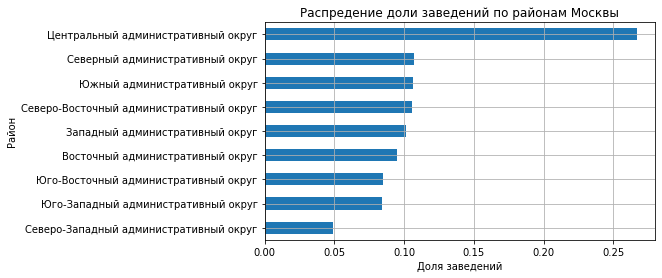

In [25]:
#Построим график
rest['district'].value_counts(ascending=True, normalize=True).plot(
    kind='barh',
    figsize=(7,4),
    title='Распредение доли заведений по районам Москвы')
plt.xlabel('Доля заведений')
plt.ylabel('Район')
plt.grid()
plt.show()

In [26]:
#Посмотрим распределение заведений по категориям в Центральном округе
rest[rest['district']=='Центральный административный округ']['category'].value_counts()

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

In [27]:
#Посмотрим распределение в долях
rest[rest['district']=='Центральный административный округ']['category'].value_counts(normalize=True)

ресторан           0.298840
кафе               0.206958
кофейня            0.190901
бар,паб            0.162355
пиццерия           0.050401
быстрое питание    0.038805
столовая           0.029438
булочная           0.022302
Name: category, dtype: float64

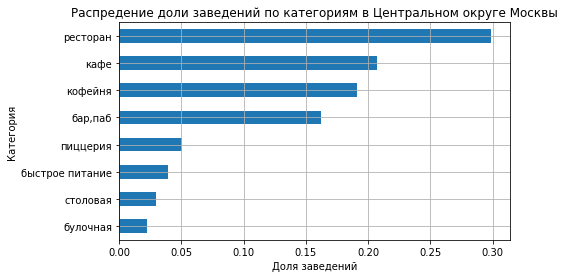

In [28]:
#Отобразим распределение на графике
rest[rest['district']=='Центральный административный округ']['category'].value_counts(
    ascending=True, normalize=True).plot(
    kind='barh',
    figsize=(7,4),
    title='Распредение доли заведений по категориям в Центральном округе Москвы')
plt.xlabel('Доля заведений')
plt.ylabel('Категория')
plt.grid()
plt.show()

Больше всего заведений в Центральном административном округе Москвы - 26,7%.
Меньше всего заведений в Северо-Западном административном округе - меньше 5%. В остальных округах заведений примерно поровну - около 8-11%.

Если рассматривать Центральный округ Москвы отдельно, то там больше всего ресторанов - почти 30%.
На втором и третьем месте идут кафе и кофейни - 20,7% и 19,1%.
Меньше всего в Центральном округе булочных - 2,2%.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [29]:
#Посмотрим кол-во и долю сетевых и несетевых заведений
rest['chain'].value_counts(), rest['chain'].value_counts(normalize=True)

(0    5200
 1    3203
 Name: chain, dtype: int64,
 0    0.618827
 1    0.381173
 Name: chain, dtype: float64)

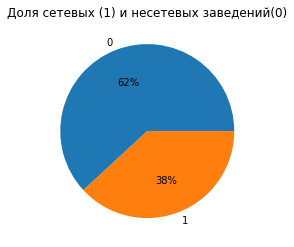

In [30]:
#Изобразим распределение долей на графике
rest['chain'].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.0f%%',
    figsize=(7,4),
    ylabel="",
    title='Доля сетевых (1) и несетевых заведений(0)',
    rot=0)
plt.show()

In [31]:
chains = rest.groupby('category')['chain'].value_counts(normalize=True)
chains.xs(1, level='chain')

category
бар,паб            0.219895
булочная           0.613281
быстрое питание    0.384743
кафе               0.327724
кофейня            0.509554
пиццерия           0.521327
ресторан           0.357003
столовая           0.279365
Name: chain, dtype: float64

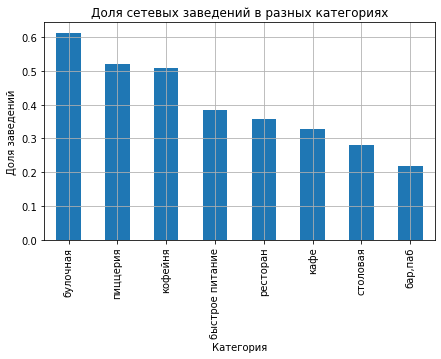

In [32]:
#Построим на графике распрелеление сетевых и несетевых заведений в разрезе категорий
chains.xs(1, level='chain').sort_values(ascending=False).plot(
    kind='bar',
    figsize=(7,4),
    title='Доля сетевых заведений в разных категориях',
    xlabel='Категория',
    ylabel='Доля заведений')
plt.grid()
plt.show()

Доля несетевых заведений выше, чем сетевых - 61,9% против 38,1%.

В барах, заведениях быстрого питания, кафе , ресторанах и столовых преобладают несетевые заведения.
В булочных, кофейнях и пиццериях, наоборот, больше сетевых заведений.

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [33]:
#Выведем статистические показатели для столбца `seats`
rest[rest['seats']!=-1]['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Для анализа исключили строки, где нет данных о кол-ве мест. 

Среднее значение сильно выше медианы (108 против 75), что говорит о наличии больших значений, которые завышают среднее. Это подтверждается наличием максимального значения в 1288 мест.
Такое количество выглядит неправдоподобно большим. Сложно представить заведение общепита с таким кол-вом посадочных мест. Это может быть ошибкой.

Минимальное значение в 0 посадочных мест может быть как ошибкой, так и реальным значением - например, бывают кофейни без посадочных мест. Возможно также, что0 был использован как индикатор отсутствия данных.

Text(0, 0.5, 'Частота')

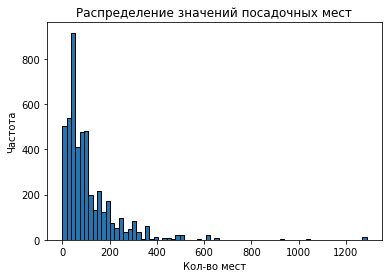

In [34]:
#Посмотрим распределение значений на графике
rest[rest['seats']!=-1]['seats'].plot(
    kind='hist', 
    bins=70, 
    edgecolor='black',
    title='Распределение значений посадочных мест')
plt.xlabel('Кол-во мест')
plt.ylabel('Частота')

<AxesSubplot:>

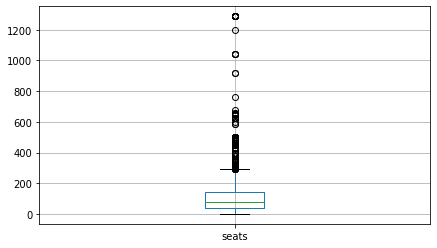

In [35]:
#Построим ящик с усами
plt.figure(figsize=(7,4))
rest[rest['seats']!=-1].boxplot(column='seats')

Оба графика показывают наличие нетипично больших значений. Посмотрим распределение значений без выбросов.

Text(0, 0.5, 'Частота')

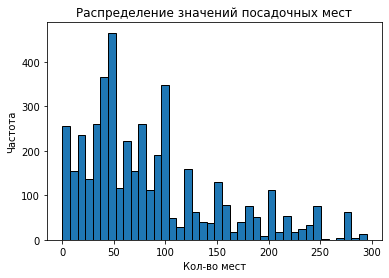

In [36]:
rest[(rest['seats']!=-1)&(rest['seats']<300)]['seats'].plot(
    kind='hist', 
    bins=40, 
    edgecolor='black',
    title='Распределение значений посадочных мест')
plt.xlabel('Кол-во мест')
plt.ylabel('Частота')

Распределение значений все равно ненормальное.

Посмотрим наиболее типичное кол-во посадочных мест в зависимости от категории заведения. Так как в данных присутствуют выбросы, возьмем медиану, а не среднее значение.

In [37]:
for category_name, group_df in rest[(rest['seats']!=-1)].groupby('category'):
    print(f"{category_name}: среднее число мест = {group_df['seats'].median()}")

бар,паб: среднее число мест = 82.0
булочная: среднее число мест = 50.0
быстрое питание: среднее число мест = 65.0
кафе: среднее число мест = 60.0
кофейня: среднее число мест = 80.0
пиццерия: среднее число мест = 55.0
ресторан: среднее число мест = 86.0
столовая: среднее число мест = 75.5


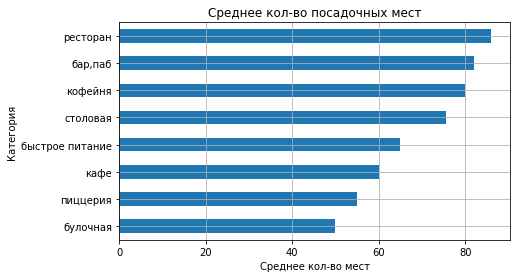

In [38]:
rest[(rest['seats']!=-1)].groupby('category')['seats'].median().sort_values().plot(
    figsize=(7,4),
    kind='barh',
    title='Среднее кол-во посадочных мест')
plt.xlabel('Среднее кол-во мест')
plt.ylabel('Категория')
plt.grid()
plt.show()

Среднее кол-во посадочных мест для различных категорий:
- бар,паб: 82
- булочная: 50
- быстрое питание: 65
- кафе: 60
- кофейня: 80
- пиццерия: 55
- ресторан: 86
- столовая: 76

Однако, стоит учитывать, что кол-во мест указано только для 4795 из 8406. Поэтому данная статистика посчитана на основе лишь половины заведений.
Кроме того, среднее кол-во мест для кофейни, равное 80, что даже больше, чем у кафе, тоже похоже на ошибку.
Возможно, данные о кол-ве мест содержат много ошибок и их не стоит учитывать при принятии решения.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [39]:
#Вычислим средний рейтинг по категориям
rest.groupby('category')['rating'].mean()

category
бар,паб            4.387696
булочная           4.268359
быстрое питание    4.050249
кафе               4.123896
кофейня            4.277282
пиццерия           4.301264
ресторан           4.290402
столовая           4.211429
Name: rating, dtype: float64

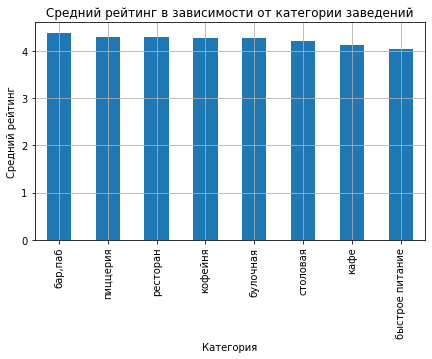

In [40]:
#Построим график
rest.groupby('category')['rating'].mean().sort_values(ascending=False).plot(kind='bar',
    figsize=(7,4),
    title='Средний рейтинг в зависимости от категории заведений',
    xlabel='Категория',
    ylabel='Средний рейтинг')
plt.grid()
plt.show()

Средний рейтинг почти не различается в разных категориях и равен 4,2-4,4.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [41]:
# Вычисляем корреляционную матрицу с использованием phi_k
interval_cols = ['seats']
correlation_matrix=rest[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix(interval_cols=interval_cols)
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

,rating
price,0.344793
district,0.316524
category,0.271267
is_24_7,0.157314
chain,0.139391
seats,0.000000


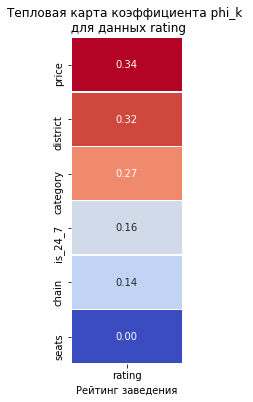

In [42]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками заведения
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг заведения')

# Выводим график
plt.show()

Проверим взаимосвязь цены и рейтинга.

In [43]:
rest.groupby('price')['rating'].mean().sort_values(ascending=False)

price
высокие          4.436611
выше среднего    4.386348
средние          4.297874
низкие           4.173077
Name: rating, dtype: float64

Наибольшую связь рейтинг имеет с ценой - 0,34, районом - 0,32 и категорией - 0,27. Остальные признаки такие, как круглосуточная работа, сетевое заведение или кол-во мест почти или совсем не оказывают влияние на рейтинг.

Чем выше цена, тем выше средний рейтинг заведения.
У заведений с высокими ценами средний рейтинг - 4,4, а у заведений с низкими ценами - 4,2.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [44]:
#Посчитаем средний рейтинг для топ-15 сетей в Москве
top_15_chains = rest[rest['chain']==1]['name'].value_counts().head(15).index
rest[rest['name'].isin(top_15_chains)].groupby('name').agg(count=('name', 'count'),
    avg_rating=('rating', 'mean')).sort_values(by=['count'], ascending=False)

,count,avg_rating
name,,
шоколадница,120,4.177500
домино'с пицца,77,4.171429
додо пицца,74,4.286486
one price coffee,72,4.069444
яндекс лавка,69,3.872464
cofix,65,4.075385
prime,50,4.116000
хинкальная,44,4.322727
кофепорт,42,4.147619


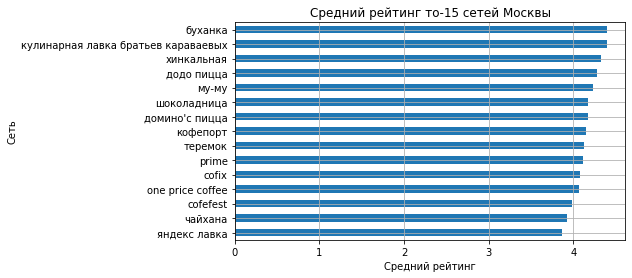

In [45]:
#Построим график
top_15_chains = rest[rest['chain']==1]['name'].value_counts().head(15).index
rest[rest['name'].isin(top_15_chains)].groupby('name')['rating'].mean().sort_values().plot(
    figsize=(7,4),
    kind='barh',
    title='Средний рейтинг то-15 сетей Москвы')
plt.ylabel('Сеть')
plt.xlabel('Средний рейтинг')
plt.grid()
plt.show()

In [46]:
# Выведем категории этих сетей
rest[rest['name'].isin(top_15_chains)]['category'].value_counts(normalize=True)

кофейня            0.411980
ресторан           0.227384
пиццерия           0.185819
кафе               0.122249
булочная           0.030562
быстрое питание    0.014670
бар,паб            0.004890
столовая           0.002445
Name: category, dtype: float64

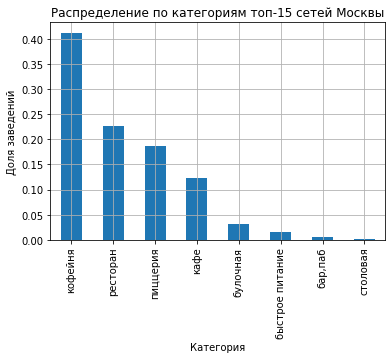

In [47]:
#Построим график
rest[rest['name'].isin(top_15_chains)]['category'].value_counts(normalize=True).plot(
    kind='bar',
    title='Распределение по категориям топ-15 сетей Москвы',
    xlabel='Категория',
    ylabel='Доля заведений')
plt.grid()
plt.show()

Средний рейтинг для топ-15 сетей варьируется от 3,9 до 4,4. Больше всего среди сетей составляют кофейни - 41%.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [48]:
#Посчитаем средний чек доя каждого округа Москвы
rest.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False)

district
Центральный административный округ         1191.057547
Западный административный округ            1053.225490
Северный административный округ             927.959627
Южный административный округ                834.398089
Северо-Западный административный округ      822.222930
Восточный административный округ            820.626923
Юго-Западный административный округ         792.561702
Северо-Восточный административный округ     716.611296
Юго-Восточный административный округ        654.097938
Name: middle_avg_bill, dtype: float64

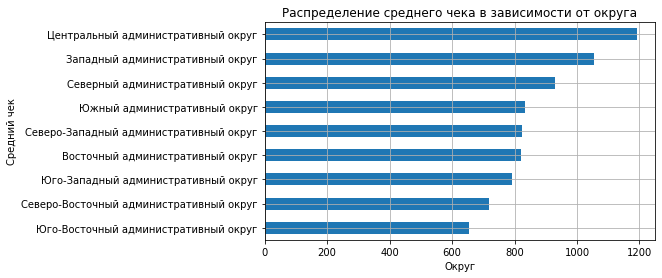

In [49]:
#Построим график
rest.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=True).plot(
    kind='barh',
    figsize=(7,4),
    title='Распределение среднего чека в зависимости от округа')
plt.xlabel('Округ')
plt.ylabel('Средний чек')
plt.grid()
plt.show()

В Центральном округе самый высокий средний чек - 1191 руб. 
На втором месте - Западный округ со средним чеком в 1053 руб. 
Во всех остальных округах средний чек значительно ниже. 
Самый низкий средний чек в Юго-Восточном округе - 654 руб.

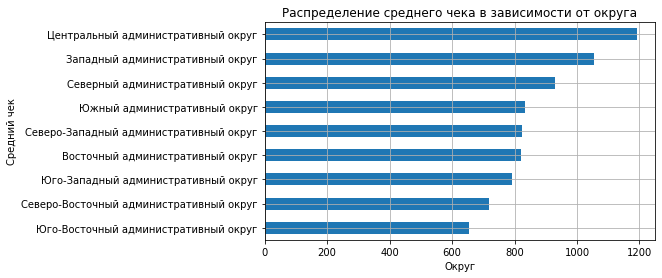

In [50]:
rest.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=True).plot(
    kind='barh',
    figsize=(7,4),
    title='Распределение среднего чека в зависимости от округа')
plt.xlabel('Округ')
plt.ylabel('Средний чек')
plt.grid()
plt.show()

---

### Промежуточный вывод

По итогу исследовательского анализа данных можно сделать следующие выводы:
- Больше всего заведений в категориях "кафе" и "ресторан" - 28,3% и 24,3% соответственно. Меньше всего заведений в категории "булочная" - 3%.
- Больше всего заведений в Центральном административном округе Москвы - 26,7%. Меньше всего заведений в Северо-Западном административном округе - меньше 5%. В остальных округах заведений примерно поровну - около 8-11%.
- Чем ближе к центру, тем выше средний чек. В Центральном округе он составляет - 1191 руб. Самый низкий средний чек в Юго-Восточном округе - 654 руб.
- Средний рейтинг заведений практически не меняется в зависимости от категорий и составляет 4,2-4,4. Однако, цена все же оказывает небольшое влияние на рейтинг - чем она выше, тем выше рейтинг.
- Доля несетевых заведений выше, чем сетевых - 61,9% против 38,1%. Сети характерны для булочных, кофеен и пиццерий.
- Среди топовых сетей по кол-ву заведений больше всего кофеен - 41%.
- Кол-во мест сильно варьируется от заведения к заведению.

## 4. Итоговый вывод и рекомендации

Для исследования были объеденены данные из двух датасетов `rest_info.csv` и `rest_price.csv`. Итоговый датасет состоял из 13 столбцов и 8403 строки и содержал информацию о различных заведениях общественного питания Москвы. Акцент исследования был на изучении статистических характеристик рынка для лучшего понимания, какое заведение стоит открывать заказчикам. 

Характеристики рынка общественного питания Москвы:
- Больше половины заведений приходится на кафе и рестораны. 19% и 16% занимают кофейни и бары/пабы. Остальная доля рынка (менее 15%) приходится на пиццерии, заведения быстрого питания, столовые и булочные.
- Наибольшее количество заведений сосредоточено в Центральном округе Москвы. Там на первое место выходят рестораны (30%), за ними следуют кафе и кофейни. Также в Центральном округе самый высокий средний чек.
- Цены оказывают небольшое влияние на рейтинг заведения. Чем они выше, тем выше рейтинг. Остальные факторы не влияют на рейтинг.
- Доля несетевых заведений выше, чем сетевых - 61,9% против 38,1%. Сети характерны для булочных, кофеен и пиццерий.

В качестве рекомендации стоит отметить, что в Центральном округе Москвы можно рассмотреть открытие несетевого ресторана с высоким средним чеком. Однако, стоит учитывать, что конкуренция там будет высокая.

Если нет опыта в ресторанном бизнесе, стоит рассмотреть другие округи Москвы и начать с открытия кафе или кофейни со средним уровнем цен. Конкуренции будет меньше, но и заработок вместе с рейтингом могут тоже быть ниже, чем у дорогих ресторанов.